In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
proj = pd.read_csv('KNN_Project_Data')

In [3]:
proj.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scale = StandardScaler()

In [7]:
scale.fit(proj.drop('TARGET CLASS', axis =1))

StandardScaler()

In [8]:
trans = scale.transform(proj.drop('TARGET CLASS', axis =1))

In [12]:
trans_df = pd.DataFrame(trans, columns = proj.columns[:-1])

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X= trans_df
y= proj['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
KNN = KNeighborsClassifier(n_neighbors=1)

In [18]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
pred =KNN.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [21]:
print(confusion_matrix(y_test,pred))

[[113  38]
 [ 38 111]]


In [22]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       151
           1       0.74      0.74      0.74       149

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



In [30]:
error = []
for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predi = knn.predict(X_test)
    error.append(np.mean(predi != y_test))
    

Text(0, 0.5, 'error')

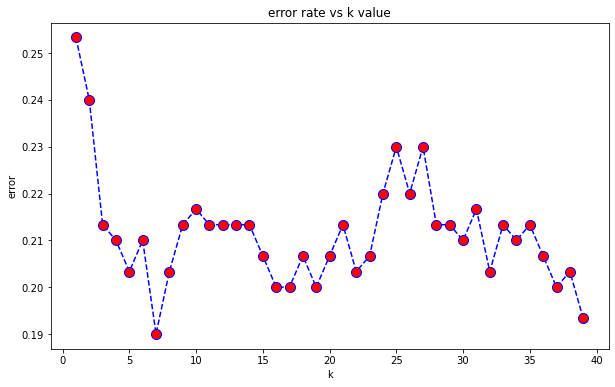

In [32]:
plt.figure(figsize = (10,6))
plt.plot(range (1,40), error, color = 'blue',linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize =10)
plt.title('error rate vs k value')
plt.xlabel('k')
plt.ylabel('error')

In [45]:
KN = KNeighborsClassifier(n_neighbors=7)
KN.fit(X_train, y_train)
pree = KN.predict(X_test)

In [46]:
print(classification_report(y_test, pree))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       151
           1       0.82      0.80      0.81       149

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300

